In [4]:
#! pip install torchaudio==2.6.0
#! pip install tqdm
#! pip install soundfile
#! pip install matplotlib

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
# Adiciona a pasta raiz do projeto ao PYTHONPATH
sys.path.append(os.path.abspath('..'))

In [2]:
from src.preprocessing import *

In [3]:
! ls '../data/raw/LA/ASVspoof2019_LA_dev/flac/' | head -5

LA_D_1000265.flac
LA_D_1000752.flac
LA_D_1001095.flac
LA_D_1002130.flac
LA_D_1002200.flac
ls: write error: Broken pipe


In [8]:
! ls '../data/raw/LA/ASVspoof2019_LA_dev/flac/LA_D_1000265.flac'

../data/raw/LA/ASVspoof2019_LA_dev/flac/LA_D_1000265.flac


In [9]:
filepath = '../data/raw/LA/ASVspoof2019_LA_dev/flac/LA_D_1000265.flac'
waveform = load_audio(filepath)
mfcc_features = extract_mfcc(waveform)

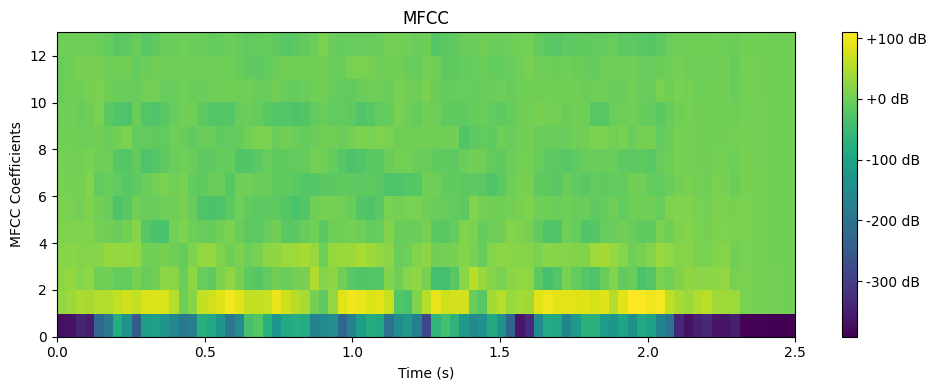

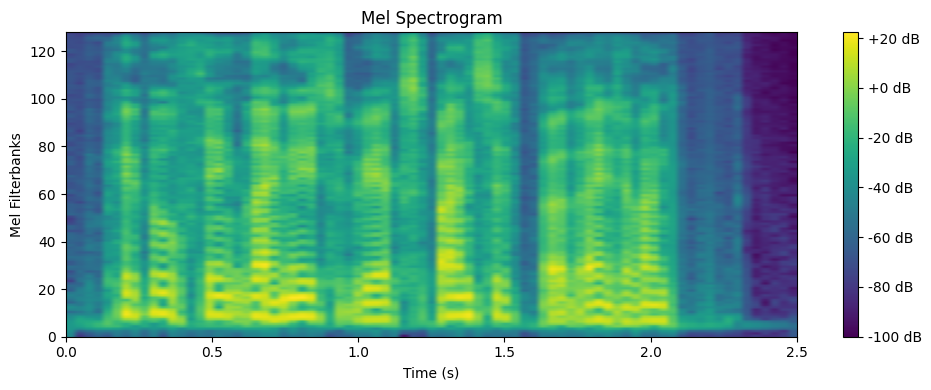

In [10]:


sample_rate = 16000
n_fft = 1024
hop_length = 512

# Carregar áudio
waveform = load_audio('../data/raw/LA/ASVspoof2019_LA_train/flac/LA_T_1000137.flac')

# Tocar áudio
ipd.display(ipd.Audio(waveform.numpy(), rate=sample_rate))

# MFCC
feature_mfcc = extract_mfcc(waveform, sample_rate=sample_rate, n_fft=n_fft, hop_length=hop_length)
num_frames_mfcc = feature_mfcc.shape[-1]
duration = waveform.shape[-1] / sample_rate
time_axis_mfcc = np.linspace(0, duration, num_frames_mfcc)

plt.figure(figsize=(10, 4))
plt.imshow(feature_mfcc.squeeze().numpy(), cmap='viridis', origin='lower', aspect='auto', 
           extent=[time_axis_mfcc.min(), time_axis_mfcc.max(), 0, feature_mfcc.shape[1]])
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

# Mel Spectrogram
feature_mel = extract_melspectrogram(waveform, sample_rate=sample_rate, n_fft=n_fft, hop_length=hop_length)
num_frames_mel = feature_mel.shape[-1]
time_axis_mel = np.linspace(0, duration, num_frames_mel)

plt.figure(figsize=(10, 4))
plt.imshow(feature_mel.squeeze().numpy(), cmap='viridis', origin='lower', aspect='auto',
           extent=[time_axis_mel.min(), time_axis_mel.max(), 0, feature_mel.shape[1]])
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Filterbanks')
plt.tight_layout()
plt.show()


In [ ]:
folder_path = '../data/raw/LA/ASVspoof2019_LA_train/flac/'
save_melspectrograms_from_folder(folder_path, save_path='../data/processed/melspectrograms.pkl', N=-1)

In [12]:
! du -sh '../data/processed/melspectrograms.pkl' 

1.4G	../data/processed/melspectrograms.pkl


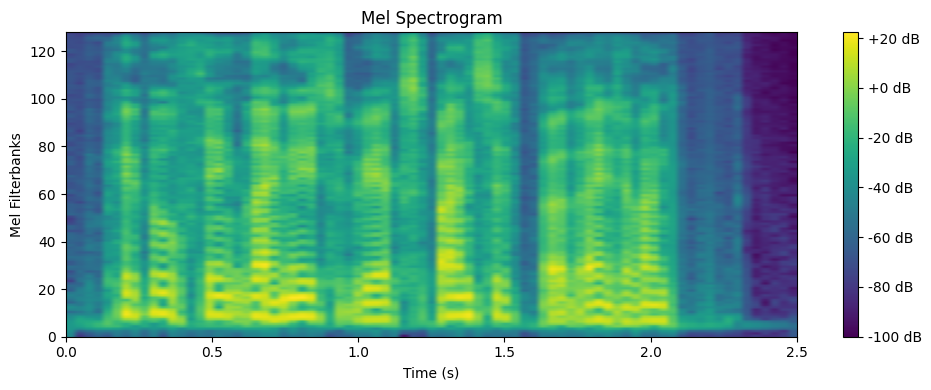

In [ ]:
# Carregar o primeiro Mel Spectrogram salvo
save_path = '../data/processed/melspectrograms.pkl'

if os.path.exists(save_path):
    with open(save_path, 'rb') as f:
        spectrograms_list = pickle.load(f)


target_filename = 'LA_T_1000137.flac'
filtered_entry = next((entry for entry in spectrograms_list if entry['file'] == target_filename), None)
filtered_entry

# Mel Spectrogram
feature_mel = filtered_entry['spectrogram']
num_frames_mel = feature_mel.shape[-1]
time_axis_mel = np.linspace(0, duration, num_frames_mel)

plt.figure(figsize=(10, 4))
plt.imshow(feature_mel.squeeze(), cmap='viridis', origin='lower', aspect='auto',
           extent=[time_axis_mel.min(), time_axis_mel.max(), 0, feature_mel.shape[1]])
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Filterbanks')
plt.tight_layout()
plt.show()


In [ ]:
save_filterbank_features_from_folder(folder_path, save_path='../data/processed/filterbanks_features.pkl', N=-1)

Extracting Filterbank Features:   2%|▏         | 513/25380 [00:11<09:46, 42.39it/s]

In [4]:
folder_path = '../data/raw/LA/ASVspoof2019_LA_train/flac/'
save_mfcc_features_from_folder(folder_path, save_path='../data/processed/mfccs_features.pkl', N=-1)

Extracting MFCC Features: 100%|██████████| 25380/25380 [05:58<00:00, 70.72it/s]


Saved 25380 MFCC features to ../data/processed/mfccs_features.pkl


In [5]:
! du -sh '../data/processed/mfccs_features.pkl' 

7.8M	../data/processed/mfccs_features.pkl


In [6]:
# load mfcc features
save_path = '../data/processed/mfccs_features.pkl' 

if os.path.exists(save_path):
    with open(save_path, 'rb') as f:
        mfcc_features_list = pickle.load(f)


In [7]:
# load fb features
save_path = '../data/processed/filterbanks_features.pkl' 

if os.path.exists(save_path):
    with open(save_path, 'rb') as f:
        filterbanks_features_list = pickle.load(f)

In [8]:
filterbanks_features_list[0]['features'].shape, len(filterbanks_features_list)

((640,), 25380)

In [10]:
mfcc_features_list[0]['features'].shape, len(mfcc_features_list)

((65,), 25380)

# Data From ASVSpoof 2021 DF

In [12]:
filepath = '../data/raw/ASVspoof2021_DF_eval_part00/flac/DF_E_2000011.flac'
waveform = load_audio(filepath)
mfcc_features = extract_mfcc(waveform)

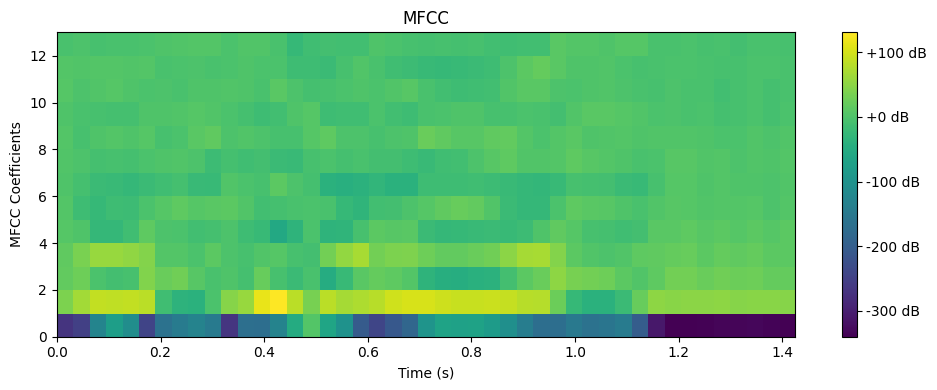

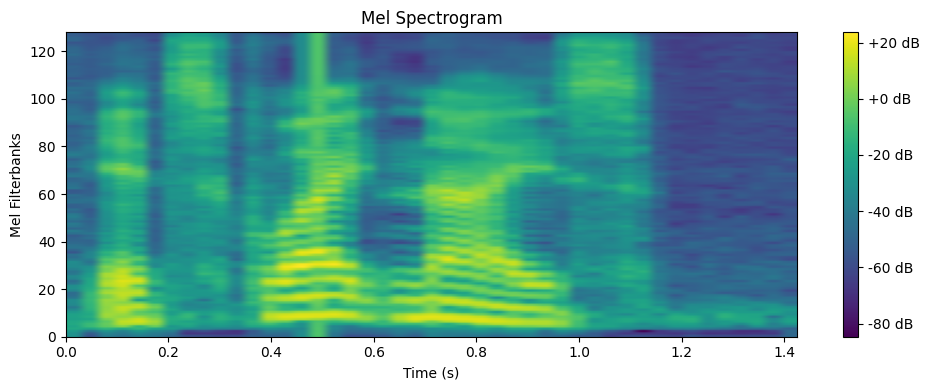

In [13]:
sample_rate = 16000
n_fft = 1024
hop_length = 512

# Carregar áudio
waveform = load_audio(filepath)

# Tocar áudio
ipd.display(ipd.Audio(waveform.numpy(), rate=sample_rate))

# MFCC
feature_mfcc = extract_mfcc(waveform, sample_rate=sample_rate, n_fft=n_fft, hop_length=hop_length)
num_frames_mfcc = feature_mfcc.shape[-1]
duration = waveform.shape[-1] / sample_rate
time_axis_mfcc = np.linspace(0, duration, num_frames_mfcc)

plt.figure(figsize=(10, 4))
plt.imshow(feature_mfcc.squeeze().numpy(), cmap='viridis', origin='lower', aspect='auto', 
           extent=[time_axis_mfcc.min(), time_axis_mfcc.max(), 0, feature_mfcc.shape[1]])
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

# Mel Spectrogram
feature_mel = extract_melspectrogram(waveform, sample_rate=sample_rate, n_fft=n_fft, hop_length=hop_length)
num_frames_mel = feature_mel.shape[-1]
time_axis_mel = np.linspace(0, duration, num_frames_mel)

plt.figure(figsize=(10, 4))
plt.imshow(feature_mel.squeeze().numpy(), cmap='viridis', origin='lower', aspect='auto',
           extent=[time_axis_mel.min(), time_axis_mel.max(), 0, feature_mel.shape[1]])
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Filterbanks')
plt.tight_layout()
plt.show()


In [3]:
# 2:50 com chunks de 100, 3:10 com 1000
folder_path = '../data/raw/ASVspoof2021_DF_eval_part00/flac/'
save_path = '../data/processed/melspectrograms_ASVspoof2021_DF_eval_part00.pkl'
save_melspectrograms_from_folder_parallel(folder_path, save_path=save_path, N=-1, num_parts=4, chunk_size=400)

Processando parte 1 com 38239 arquivos...


Parte 1: 100%|█████████████████████████████████████████████| 38239/38239 [02:15<00:00, 282.09file/s]


Salvos 38239 espectrogramas em ../data/processed/melspectrograms_ASVspoof2021_DF_eval_part00_part1.pkl
Processando parte 2 com 38239 arquivos...


Parte 2: 100%|█████████████████████████████████████████████| 38239/38239 [02:10<00:00, 293.72file/s]


Salvos 38239 espectrogramas em ../data/processed/melspectrograms_ASVspoof2021_DF_eval_part00_part2.pkl
Processando parte 3 com 38239 arquivos...


Parte 3: 100%|█████████████████████████████████████████████| 38239/38239 [02:09<00:00, 295.90file/s]


Salvos 38239 espectrogramas em ../data/processed/melspectrograms_ASVspoof2021_DF_eval_part00_part3.pkl
Processando parte 4 com 38238 arquivos...


Parte 4: 100%|█████████████████████████████████████████████| 38238/38238 [02:11<00:00, 290.47file/s]


Salvos 38238 espectrogramas em ../data/processed/melspectrograms_ASVspoof2021_DF_eval_part00_part4.pkl


In [17]:
! du -sh '../data/processed/melspectrograms_ASVspoof2021_DF_eval_part00_part1.pkl' 

1.8G	../data/processed/melspectrograms_ASVspoof2021_DF_eval_part00_part1.pkl


In [38]:
# Carregar o primeiro Mel Spectrogram salvo
save_path = '../data/processed/melspectrograms_ASVspoof2021_DF_eval_part00_part1.pkl'

if os.path.exists(save_path):
    with open(save_path, 'rb') as f:
        spectrograms_list = pickle.load(f)

target_filename = 'DF_E_2000011.flac'
filtered_entry = next((entry for entry in spectrograms_list if entry['file'] == target_filename), None)
filtered_entry

{'file': np.str_('DF_E_2000011.flac'),
 'spectrogram': array([[[-30.042412, -56.56173 , -39.354588, ..., -59.479424,
          -58.97815 , -47.912373],
         [-29.54541 , -53.08927 , -36.132626, ..., -67.58233 ,
          -66.871864, -48.07259 ],
         [-25.980736, -42.20485 , -29.056942, ..., -70.4648  ,
          -64.30826 , -47.264275],
         ...,
         [-49.267384, -54.527206, -59.383156, ..., -57.057457,
          -61.510185, -60.81943 ],
         [-52.728653, -56.232513, -58.123287, ..., -58.001152,
          -61.85639 , -62.917217],
         [-52.346645, -57.18296 , -56.31095 , ..., -59.841774,
          -64.42395 , -60.200775]]], dtype=float32)}

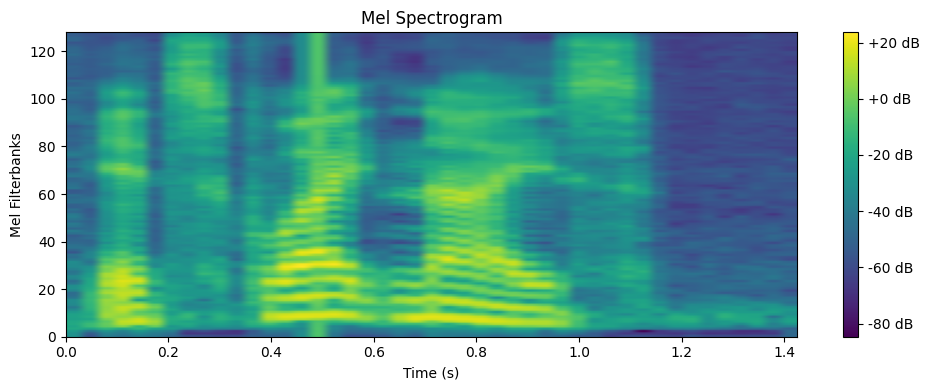

In [43]:
# Mel Spectrogram
feature_mel = filtered_entry['spectrogram']
num_frames_mel = feature_mel.shape[-1]
time_axis_mel = np.linspace(0, duration, num_frames_mel)

plt.figure(figsize=(10, 4))
plt.imshow(feature_mel.squeeze(), cmap='viridis', origin='lower', aspect='auto',
           extent=[time_axis_mel.min(), time_axis_mel.max(), 0, feature_mel.shape[1]])
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Filterbanks')
plt.tight_layout()
plt.show()


In [ ]:
save_filterbank_features_from_folder(folder_path, save_path='../data/processed/filterbanks_features_ASVspoof2021_DF_eval_part00.pkl', N=-1)

Extracting Filterbank Features:   8%|▊         | 2114/25380 [00:59<11:01, 35.15it/s]

In [ ]:
folder_path = '../data/raw/LA/ASVspoof2019_LA_train/flac/'
save_mfcc_features_from_folder(folder_path, save_path='../data/processed/mfccs_features.pkl', N=-1)